## Lab Feature extraction & Lab Data cleaning and wrangling & Comparing regression models

### Work from yesterday's labs

#### Import libraries

In [284]:
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline

pd.set_option('display.max_columns', None)
import re

#### Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df.

In [285]:
customer_df = pd.read_csv('../../day1/lab-cleaning-categorical-data/files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


#### First look at its main features (head, shape, info).

In [286]:
customer_df.shape

(9134, 24)

In [287]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

#### Rename the columns so they follow the PE8 (snake case).

In [288]:
customer_df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [289]:
# Change column names to lower case
cols = []
for i in range(len(customer_df.columns)):
    cols.append(customer_df.columns[i].lower()) 
customer_df.columns = cols

In [290]:
# Replace spaces in column names with _
cols = []
for x in customer_df.columns:
    x = x.replace(' ', '_')
    cols.append(x) 
customer_df.columns = cols

In [291]:
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [292]:
# Add _ to column name employmentstatus
customer_df = customer_df.rename(columns={'employmentstatus': 'employment_status'})
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employment_status', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

#### Change effective to date column to datetime format.

In [293]:
customer_df.dtypes

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employment_status                 object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
dtype: object

In [294]:
customer_df.effective_to_date = pd.to_datetime(customer_df.effective_to_date, errors='coerce')
customer_df.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employment_status                        object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

#### Check NaN values per column

In [295]:
customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employment_status                0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

#### Define a function that differentiates between continuous and discrete variables.

In [296]:
len(customer_df.customer_lifetime_value.value_counts())

for i in customer_df:
    print (len(customer_df[i].value_counts()), '----', i)

9134 ---- customer
5 ---- state
8041 ---- customer_lifetime_value
2 ---- response
3 ---- coverage
5 ---- education
59 ---- effective_to_date
5 ---- employment_status
2 ---- gender
5694 ---- income
3 ---- location_code
3 ---- marital_status
202 ---- monthly_premium_auto
36 ---- months_since_last_claim
100 ---- months_since_policy_inception
6 ---- number_of_open_complaints
9 ---- number_of_policies
3 ---- policy_type
9 ---- policy
4 ---- renew_offer_type
4 ---- sales_channel
5106 ---- total_claim_amount
6 ---- vehicle_class
3 ---- vehicle_size


In [297]:
def discr_cont(df):
    discrete = []
    continuous = []
    for col in df.columns:
        if (df[col].dtype == np.float) or (df[col].dtype== np.int64):
            if len(df[col].value_counts()) > 202:
                continuous.append(col)
            else:
                discrete.append(col)
    return continuous, discrete

In [298]:
continuous, discrete = discr_cont(customer_df)

In [299]:
print('DISCRETE', discrete)
print()
print('CONTINUOUS', continuous)

DISCRETE ['monthly_premium_auto', 'months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies']

CONTINUOUS ['customer_lifetime_value', 'income', 'total_claim_amount']


In [300]:
continuous_df = pd.DataFrame(customer_df[continuous])
continuous_df

,customer_lifetime_value,income,total_claim_amount
0,2763.519279,56274,384.811147
1,6979.535903,0,1131.464935
2,12887.431650,48767,566.472247
3,7645.861827,0,529.881344
4,2813.692575,43836,138.130879
...,...,...,...
9129,23405.987980,71941,198.234764
9130,3096.511217,21604,379.200000
9131,8163.890428,0,790.784983
9132,7524.442436,21941,691.200000


In [301]:
discrete_df = pd.DataFrame(customer_df[discrete])
discrete_df

,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,69,32,5,0,1
1,94,13,42,0,8
2,108,18,38,0,2
3,106,18,65,0,7
4,73,12,44,0,1
...,...,...,...,...,...
9129,73,18,89,0,2
9130,79,14,28,0,1
9131,85,9,37,3,2
9132,96,34,3,0,3


#### Plot a correlation matrix, what can you see?

In [302]:
continuous_df.corr()

,customer_lifetime_value,income,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.226451
income,0.024366,1.000000,-0.355254
total_claim_amount,0.226451,-0.355254,1.000000


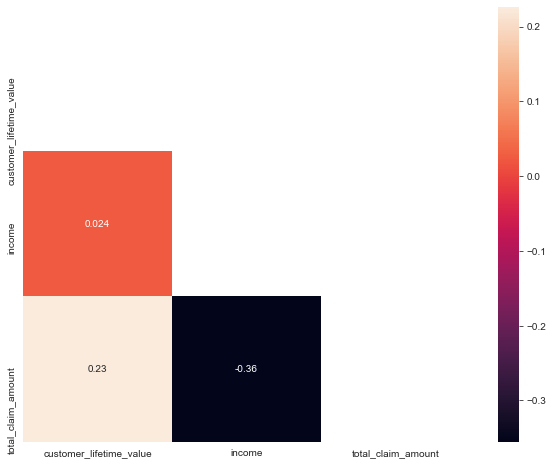

In [303]:
mask = np.zeros_like(continuous_df.corr()) 
mask[np.triu_indices_from(mask)] = True 
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(continuous_df.corr(), mask=mask, annot=True)
plt.show() 

In [304]:
discrete_df.corr()

,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
monthly_premium_auto,1.000000,0.005026,0.020257,-0.013122,-0.011233
months_since_last_claim,0.005026,1.000000,-0.042959,0.005354,0.009136
months_since_policy_inception,0.020257,-0.042959,1.000000,-0.001158,-0.013333
number_of_open_complaints,-0.013122,0.005354,-0.001158,1.000000,0.001498
number_of_policies,-0.011233,0.009136,-0.013333,0.001498,1.000000


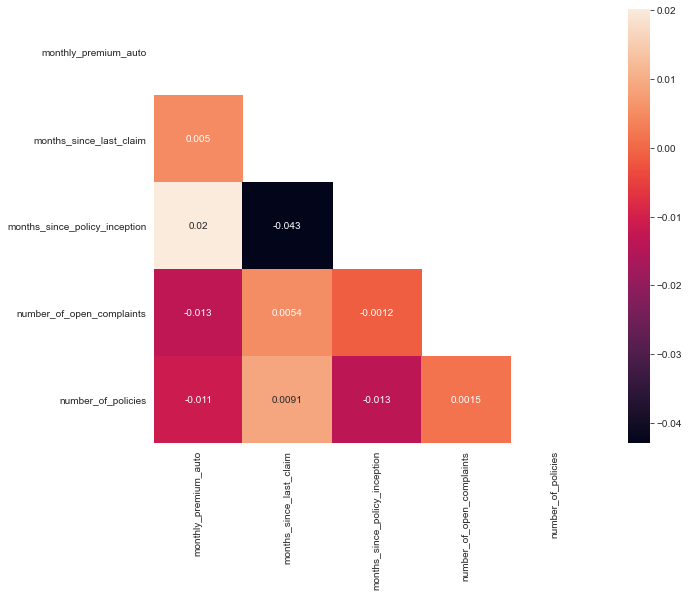

In [305]:
mask = np.zeros_like(discrete_df.corr()) 
mask[np.triu_indices_from(mask)] = True 
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(discrete_df.corr(), mask=mask, annot=True)
plt.show() 

#### Create a function to plot every discrete variables. Do the same with continuous variables

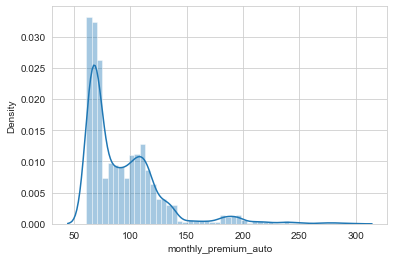

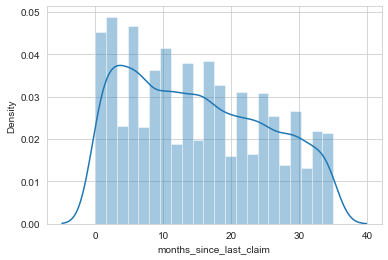

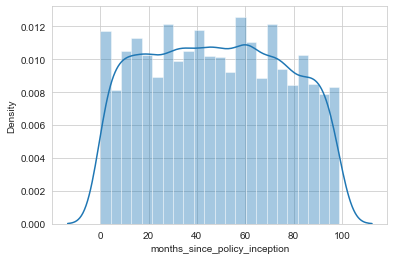

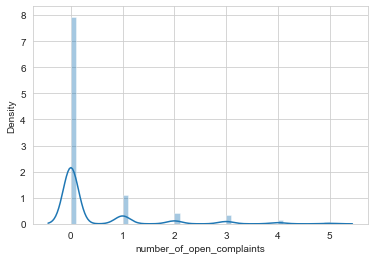

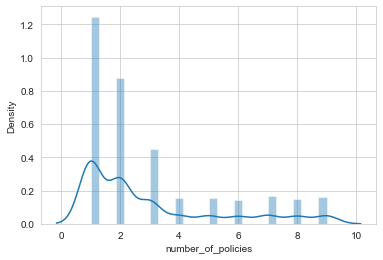

In [306]:
def plt_discrete():
    for x in discrete_df.columns:
        sns.distplot(discrete_df[x])
        plt.show()

plt_discrete()

--- customer_lifetime_value ---


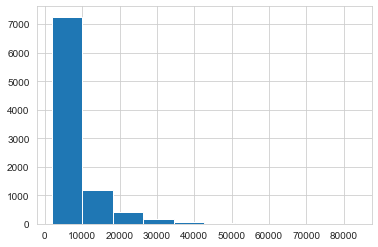

--- income ---


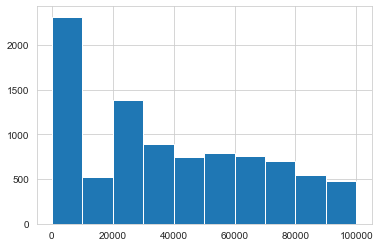

--- total_claim_amount ---


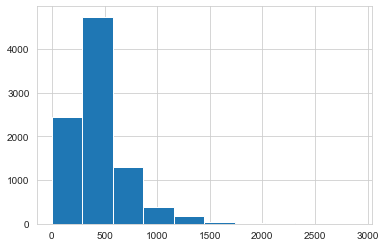

In [307]:
def plt_continuous():
    for x in continuous_df.columns:
        continuous_df[x].hist()
        print('---',x,'---')
        plt.show()

plt_continuous()

#### Look for outliers in the continuous variables we have found.

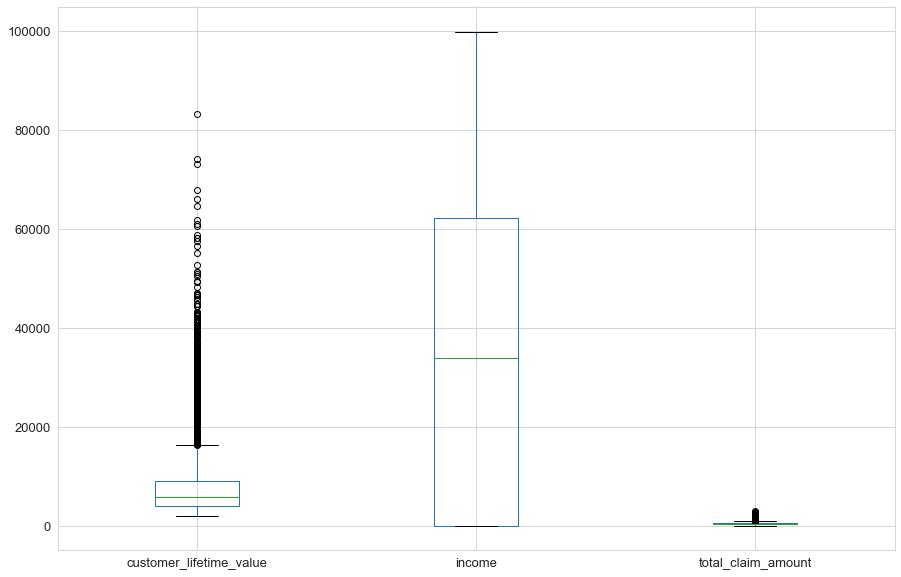

In [308]:
continuous_df.boxplot(fontsize=13,figsize=(15, 10))
plt.show()

#### Compute the IQR (interquartillic range) for outliers

In [309]:
def compute_iqr(x):
    for i in x:
        iqr = np.percentile(x[i],75) - np.percentile(x[i],25)
        upper_limit = np.percentile(x[i],75) + 1.5*iqr
        print("--",i,"--")
        print("The upper wisker is at: %4.2f" % upper_limit)
        outliers = x[x[i] > upper_limit].index.tolist() # get the row numbers of outliers
        print("The number of points outside the upper wisker is: ",len(outliers), "\n") 

In [310]:
compute_iqr(continuous_df)

-- customer_lifetime_value --
The upper wisker is at: 16414.04
The number of points outside the upper wisker is:  817 

-- income --
The upper wisker is at: 155800.00
The number of points outside the upper wisker is:  0 

-- total_claim_amount --
The upper wisker is at: 960.40
The number of points outside the upper wisker is:  453 



#### Check nan values per column.

In [311]:
continuous_df.isna().sum()

customer_lifetime_value    0
income                     0
total_claim_amount         0
dtype: int64

In [312]:
discrete_df.isna().sum()

monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
dtype: int64

#### For the categorical data, check if there is some kind of text in a variable so we would need to clean it.

In [313]:
df_cat = customer_df.select_dtypes(include = np.object)
df_cat.head()

,customer,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [314]:
#customer_df['state'].value_counts()
#customer_df['customer_lifetime_value'].value_counts()
#customer_df['coverage'].value_counts()
#customer_df['education'].value_counts()
#customer_df['employment_status'].value_counts()
#customer_df['gender'].value_counts()
#customer_df['location_code'].value_counts()
customer_df['marital_status'].value_counts()

Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64

## Lab Feature extraction

#### Drop column Customer

In [315]:
# Drop column Customer first
df_cat.drop(['customer'], axis=1, inplace = True)

#### 1. Open the categoricals variable we created before.

In [316]:
df_cat.head()

,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


#### 2. Plot all the categorical variables with the proper plot. What can you see?

-- state --


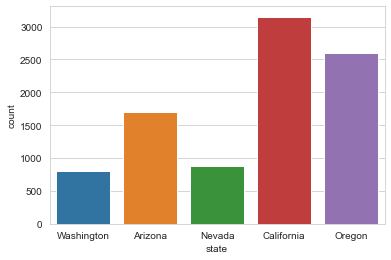

-- response --


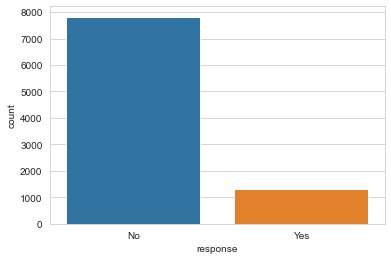

-- coverage --


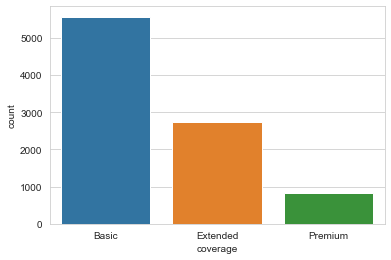

-- education --


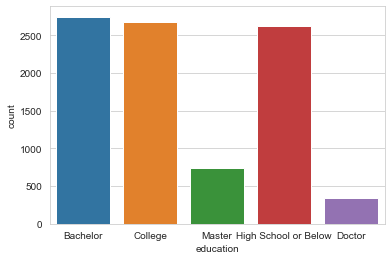

-- employment_status --


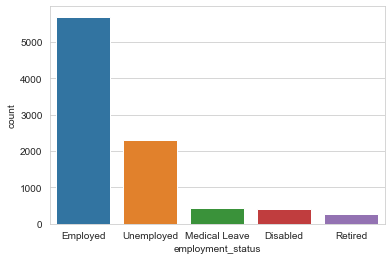

-- gender --


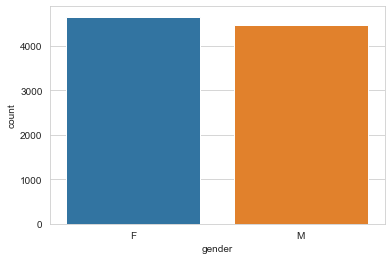

-- location_code --


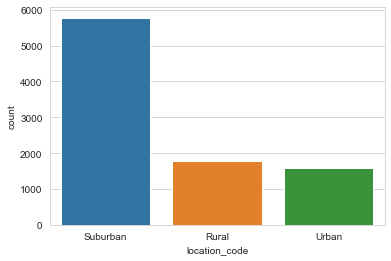

-- marital_status --


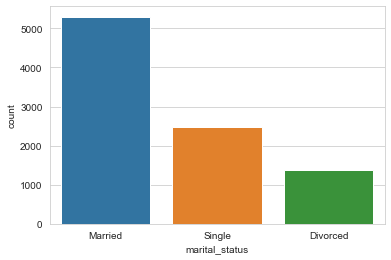

-- policy_type --


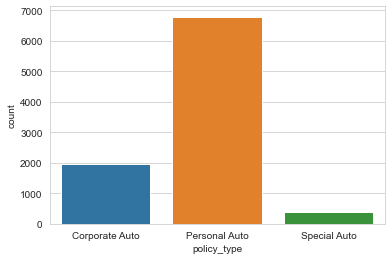

-- policy --


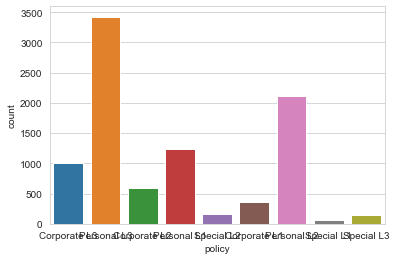

-- renew_offer_type --


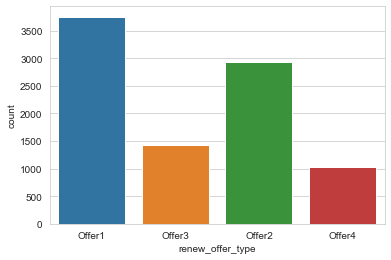

-- sales_channel --


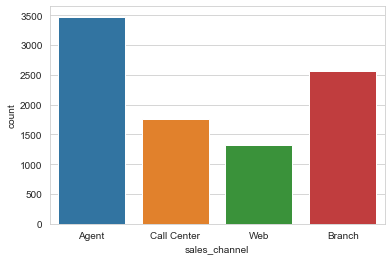

-- vehicle_class --


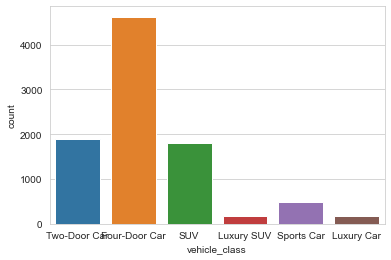

-- vehicle_size --


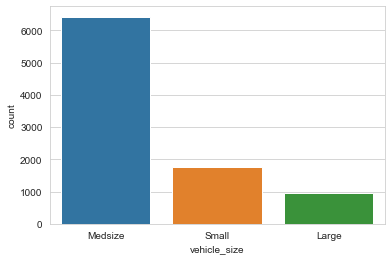

In [317]:
for x in df_cat.columns:
    ax = sns.countplot(df_cat[x])
    print('--',x,'--')
    plt.show()

Male and female are almost equally devided

High sales in states California and Oregon

Most sales among lower educated, but employed customers

Most sales through Agent and branch

Most popular car is Four-Door Car and medsize car

#### 3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

In [318]:
df_cat['policy'].value_counts()

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

In [319]:
# Create function to clean column policy: decrease number of values to Personal, Corporate and special
def clean_words(x):
    pattern = '^\S*'
    if re.search(pattern, x):
        pos = re.search(pattern, x).end()
        return x[:pos]
    else:
        x = wrong
        return 'other'

In [320]:
df_cat['policy'] = df_cat['policy'].apply(clean_words)

In [321]:
df_cat['policy'].value_counts()

Personal     6788
Corporate    1968
Special       378
Name: policy, dtype: int64

In [322]:
df_cat['employment_status'].value_counts()

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employment_status, dtype: int64

In [323]:
# Create function to clean column employment_status: decrease number of values to Employed, Unemployed and Other
def clean_employment(x):
    if 'mployed' not in x:
        return 'Other'
    else:
        return x

In [324]:
df_cat['employment_status'] = df_cat['employment_status'].apply(clean_employment)

In [325]:
df_cat['employment_status'].value_counts()

Employed      5698
Unemployed    2317
Other         1119
Name: employment_status, dtype: int64

In [326]:
df_cat['vehicle_class'].value_counts()

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: vehicle_class, dtype: int64

In [327]:
vals = pd.DataFrame(df_cat['vehicle_class'].value_counts())
vals = vals.reset_index()
vals.columns = ['vehicle_class', 'counts']
group_vehicles_df = vals[vals['counts']<1000]
group_vehicles = list(group_vehicles_df['vehicle_class'])
group_vehicles

['Sports Car', 'Luxury SUV', 'Luxury Car']

In [328]:
# Create function to clean column vehicle_class: decrease number of values to Four-Door Car, Two-Door Car, SUV and Luxury Car
def clean_vehicles(x):
    if x in group_vehicles:
        return 'Luxury Car'
    else:
        return x

df_cat['vehicle_class'] = df_cat['vehicle_class'].apply(clean_vehicles)

In [329]:
df_cat['vehicle_class'].value_counts()

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Luxury Car        831
Name: vehicle_class, dtype: int64

#### 4. Plot time variable. Can you extract something from it?

In [330]:
customer_df['effective_to_date'].unique()

array(['2011-02-24T00:00:00.000000000', '2011-01-31T00:00:00.000000000',
       '2011-02-19T00:00:00.000000000', '2011-01-20T00:00:00.000000000',
       '2011-02-03T00:00:00.000000000', '2011-01-25T00:00:00.000000000',
       '2011-01-18T00:00:00.000000000', '2011-01-26T00:00:00.000000000',
       '2011-02-17T00:00:00.000000000', '2011-02-21T00:00:00.000000000',
       '2011-01-06T00:00:00.000000000', '2011-02-06T00:00:00.000000000',
       '2011-01-10T00:00:00.000000000', '2011-01-17T00:00:00.000000000',
       '2011-01-05T00:00:00.000000000', '2011-02-27T00:00:00.000000000',
       '2011-01-14T00:00:00.000000000', '2011-01-21T00:00:00.000000000',
       '2011-02-05T00:00:00.000000000', '2011-01-29T00:00:00.000000000',
       '2011-02-28T00:00:00.000000000', '2011-02-12T00:00:00.000000000',
       '2011-02-02T00:00:00.000000000', '2011-02-07T00:00:00.000000000',
       '2011-01-22T00:00:00.000000000', '2011-02-13T00:00:00.000000000',
       '2011-01-15T00:00:00.000000000', '2011-01-08

<function matplotlib.pyplot.show(close=None, block=None)>

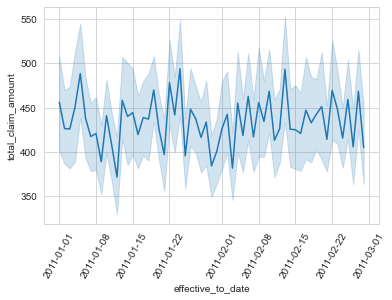

In [331]:
sns.lineplot(data=customer_df, x='effective_to_date', y='total_claim_amount')
plt.xticks(rotation=60)
plt.show

## Lab Data cleaning and wrangling

#### 1. We will start with removing outliers. So far, we have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.

In [332]:
def log_transfom_clean_(x):
    if np.isfinite(x) and x!=0: # If the value is finite and != 0...
        return np.log(x)
    else:
        return np.NAN # We are returning NaNs so that we can replace them later

In [333]:
continuous_df['customer_lifetime_value'] = continuous_df['customer_lifetime_value'].apply(log_transfom_clean_)

#### 2. Create a copy of the dataframe for the data wrangling.

In [334]:
continuous_df.shape

(9134, 3)

In [335]:
discrete_df.shape

(9134, 5)

In [336]:
df_cat.shape

(9134, 14)

In [337]:
customer_df['effective_to_date'].shape

(9134,)

#### 3. Normalize the continuous variables. You can use any one method you want.

In [338]:
def normalize_cont(continuous_df):
    cols = continuous_df.columns
    from sklearn.preprocessing import Normalizer
    transformer = Normalizer().fit(continuous_df)
    x_normalized = transformer.transform(continuous_df)
    return pd.DataFrame(x_normalized, columns=cols)

In [339]:
normalize_cont(continuous_df)

,customer_lifetime_value,income,total_claim_amount
0,0.000141,0.999977,0.006838
1,0.007822,0.000000,0.999969
2,0.000194,0.999933,0.011615
3,0.016873,0.000000,0.999858
4,0.000181,0.999995,0.003151
...,...,...,...
9129,0.000140,0.999996,0.002756
9130,0.000372,0.999846,0.017550
9131,0.011390,0.000000,0.999935
9132,0.000407,0.999504,0.031487


#### 4. Encode the categorical variables 
#### & 
#### 6.  Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding

In [340]:
#Changing categorical values in numerical values
df_cat.coverage = df_cat.coverage.map({'Basic':0,'Extended':1,'Premium':2})
df_cat['vehicle_size'] = df_cat['vehicle_size'].map({'Small':0,'Medsize':1,'Large':2 })
df_cat["employment_status"] = df_cat["employment_status"].map({"Employed" : 0, "Unemployed" : 1, "Other" : 2})
df_cat["location_code"] = df_cat["location_code"].map({"Rural" : 0, "Suburban" : 1, "Urban" : 2})

In [341]:
df_cat.head()

,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,0,Bachelor,0,F,1,Married,Corporate Auto,Corporate,Offer1,Agent,Two-Door Car,1
1,Arizona,No,1,Bachelor,1,F,1,Single,Personal Auto,Personal,Offer3,Agent,Four-Door Car,1
2,Nevada,No,2,Bachelor,0,F,1,Married,Personal Auto,Personal,Offer1,Agent,Two-Door Car,1
3,California,No,0,Bachelor,1,M,1,Married,Corporate Auto,Corporate,Offer1,Call Center,SUV,1
4,Washington,No,0,Bachelor,0,M,0,Single,Personal Auto,Personal,Offer1,Agent,Four-Door Car,1


In [342]:
df_cat=df_cat.drop(columns=['gender','response','education'])
df_cat.head()

,state,coverage,employment_status,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,0,0,1,Married,Corporate Auto,Corporate,Offer1,Agent,Two-Door Car,1
1,Arizona,1,1,1,Single,Personal Auto,Personal,Offer3,Agent,Four-Door Car,1
2,Nevada,2,0,1,Married,Personal Auto,Personal,Offer1,Agent,Two-Door Car,1
3,California,0,1,1,Married,Corporate Auto,Corporate,Offer1,Call Center,SUV,1
4,Washington,0,0,0,Single,Personal Auto,Personal,Offer1,Agent,Four-Door Car,1


In [343]:
df_categoricals = df_cat[['state', 'marital_status', 'policy_type', 'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size']]
df_ordinals = df_cat[['coverage', 'employment_status', 'location_code', 'vehicle_size']]

In [344]:
from sklearn.preprocessing import OneHotEncoder

In [345]:
#Transforming categorical columns
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(df_categoricals)
#Change from numpy array to dataframe
df_cat_tf = pd.DataFrame(enc.transform(df_categoricals).toarray())

#Get column names using get_dummies:
df_cat_tf = pd.get_dummies(df_categoricals)
df_cat_tf.head()

,vehicle_size,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,marital_status_Divorced,marital_status_Married,marital_status_Single,policy_type_Corporate Auto,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate,policy_Personal,policy_Special,renew_offer_type_Offer1,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Agent,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_SUV,vehicle_class_Two-Door Car
0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1
1,1,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0
2,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1
3,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0
4,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0


In [346]:
from sklearn.preprocessing import OrdinalEncoder

In [347]:
#Transforming ordinal columns
enc = OrdinalEncoder()
enc.fit(df_ordinals)

df_ord_tf = enc.transform(df_ordinals)
#Change from numpy array to dataframe
df_ord_df = pd.DataFrame(df_ord_tf)
df_ord_df.columns = ['coverage', 'employment_status', 'location_code', 'vehicle_size']
df_ord_df

,coverage,employment_status,location_code,vehicle_size
0,0.0,0.0,1.0,1.0
1,1.0,1.0,1.0,1.0
2,2.0,0.0,1.0,1.0
3,0.0,1.0,1.0,1.0
4,0.0,0.0,0.0,1.0
...,...,...,...,...
9129,0.0,0.0,2.0,1.0
9130,1.0,0.0,1.0,1.0
9131,1.0,1.0,1.0,1.0
9132,1.0,0.0,1.0,2.0


#### 5. The time variable can be useful. Try to transform its data into a useful one. 
Hint: Day week and month as integers might be useful.

In [349]:
import datetime
def get_months(x):
    x = x.strftime("%m")
    return x
def get_day(x):
    x = x.strftime("%j")
    return x
def get_week(x):
    x = x.strftime("%U")
    return x

In [350]:
customer_df['month'] = list(map(get_months, customer_df['effective_to_date']))
customer_df['day'] = list(map(get_day, customer_df['effective_to_date']))
customer_df['week'] = list(map(get_week, customer_df['effective_to_date']))

In [351]:
# concat all seperate dataframes and column datetime
clean_customer_df=pd.concat([df_cat_tf,df_ord_df,discrete_df,continuous_df],axis=1)
customer_df2=customer_df[['day','week','month']]
clean_customer_df=pd.concat([customer_df2,clean_customer_df],axis=1)

In [352]:
clean_customer_df.head()

,day,week,month,vehicle_size,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,marital_status_Divorced,marital_status_Married,marital_status_Single,policy_type_Corporate Auto,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate,policy_Personal,policy_Special,renew_offer_type_Offer1,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Agent,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_SUV,vehicle_class_Two-Door Car,coverage,employment_status,location_code,vehicle_size,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,customer_lifetime_value,income,total_claim_amount
0,055,08,02,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0.0,0.0,1.0,1.0,69,32,5,0,1,7.924260,56274,384.811147
1,031,05,01,1,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1.0,1.0,1.0,1.0,94,13,42,0,8,8.850738,0,1131.464935
2,050,07,02,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,2.0,0.0,1.0,1.0,108,18,38,0,2,9.464008,48767,566.472247
3,020,03,01,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0.0,1.0,1.0,1.0,106,18,65,0,7,8.941920,0,529.881344
4,034,05,02,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0.0,0.0,0.0,1.0,73,12,44,0,1,7.942253,43836,138.130879


## Lab Comparing regression models

#### 1. In this final lab, we will model our data. Import sklearn train_test_split and separate the data.

In [372]:
from sklearn.preprocessing import StandardScaler

X = clean_customer_df.drop('total_claim_amount', axis = 1) 
Y = clean_customer_df['total_claim_amount']

transformer = StandardScaler().fit(X)
x_standardized = transformer.transform(X) 

In [373]:
full_standardized = pd.DataFrame(x_standardized,columns=clean_customer_df.columns.tolist()[:-1]) # make dataframe
full_standardized.head()
X = full_standardized
Y = clean_customer_df['total_claim_amount']

In [374]:
from sklearn.model_selection import train_test_split

In [375]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [376]:
y_train

290      537.600000
2236     655.489027
6380      17.558721
3396     741.300032
2118     404.074203
           ...     
5734     308.321335
5191     350.400000
5390    1059.572464
860      667.200000
7270     344.015386
Name: total_claim_amount, Length: 6119, dtype: float64

#### 2. Try a simple linear regression with all the data to see whether we are getting good results.

In [380]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math

In [383]:
#Training the linear model
lm = linear_model.LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [386]:
#Training the linear model
predictions  = lm.predict(x_test)
print("R2 value of test is = ",round(r2_score(y_test, predictions),2))
print("The intercept of the model is = ",lm.intercept_)
print("The coefficients of the model are = ",lm.coef_)

R2 value of test is =  0.61
The intercept of the model is =  435.27850716251635
The coefficients of the model are =  [ 4.65177502e+00 -8.52688518e+00  2.70774075e+00 -1.28249520e+14
 -4.82332313e+14 -5.88662638e+14 -3.65787875e+14 -5.58910036e+14
 -3.49700056e+14 -4.01806238e+14 -5.55570909e+14 -4.99797436e+14
 -7.16003059e+14 -9.38349423e+14 -4.31898435e+14  3.36817868e+13
  2.13291199e+14  1.01348757e+14 -4.75330008e+13 -4.50821881e+13
 -3.51289555e+13 -3.04826259e+13 -5.34587508e+13 -4.94902689e+13
 -4.34710374e+13 -3.87729658e+13 -1.45630647e+14 -8.37664594e+13
 -1.15769497e+14 -1.17904957e+14 -1.40854426e+01  2.16232015e+01
  6.88284968e+01  1.28249520e+14  2.08605064e+02 -1.32840816e-01
 -1.80204832e+00  1.45324625e+00  9.16324585e-01 -1.15663143e+00
 -7.19727875e+01]


In [388]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

MAE = mean_absolute_error(y_test,predictions)
MSE = mean_squared_error(y_test,predictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,predictions)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.2f" % (R2))

The mean absolute error of the model in the test set is: 129.65
The mean squared error of the model in the test set is: 31619.01
The root mean squared error of the model in the test set is: 177.82
The R2 of the model in the test set is: 0.61


#### 3. Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.

In [406]:
def models(data, target, mode, k = 5, test_size=0.3, multiclass = 'multinomial'):
    # X Y split
    
    X = data.drop(target, axis = 1)
    y = data[target]
    
    # Train Test split
    from sklearn.model_selection import train_test_split
    
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=42)
    
    # linear model
    if mode == 'linear_model':
        from sklearn import linear_model
        lm = linear_model.LinearRegression()
        model =lm.fit(X_train,y_train)
        predictions  = lm.predict(X_test)
        predictions_df = pd.DataFrame(predictions, columns=[y.name])
        
    # K NeighborsRegressor
    elif mode == 'k-nn':
        from sklearn.neighbors import KNeighborsRegressor

        model = KNeighborsRegressor(n_neighbors=k)
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        predictions_df = pd.DataFrame(predictions, columns=[y.name])
        
    # Logistic model
    elif mode == 'logistic':
        from sklearn.linear_model import LogisticRegression
        from sklearn.metrics import cohen_kappa_score
        model = LogisticRegression(random_state=0, solver='lbfgs', multi_class=multiclass).fit(X_train, y_train)
        predictions = model.predict(X_test)
        predictions_df = pd.DataFrame(model.predict(X_test))
        
        print("The accuracy of the model in the TEST set is: ", round(model.score(X_test, y_test),2))
        print("The kappa of the model is: ", cohen_kappa_score(y,model.predict(X)))
        
    elif mode == 'mlpregressor':
        from sklearn.neural_network import MLPRegressor
        model = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)
        predictions = model.predict(X_test)
        predictions_df = pd.DataFrame(predictions, columns=[y.name])

    else:
        print('something went wrong')
        
    from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
    MAE = mean_absolute_error(y_test,predictions)
    MSE = mean_squared_error(y_test,predictions)
    RMSE = np.sqrt(MSE)
    R2 = r2_score(y_test,predictions)
    
    results_error_matrix=[MAE,MSE,RMSE,R2]


    print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
    print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
    print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
    print("The R2 of the model in the test set is: %4.2f" % (R2))
    
    return predictions, predictions_df, model, results_error_matrix  

#### 4. Use the function to check LinearRegressor and KNeighborsRegressor.

In [407]:
predictions, predictions_df, model, results_error_matrix = models(clean_customer_df, 'total_claim_amount', 'linear_model')

The mean absolute error of the model in the test set is: 130.06
The mean squared error of the model in the test set is: 31706.45
The root mean squared error of the model in the test set is: 178.06
The R2 of the model in the test set is: 0.61


In [408]:
predictions, predictions_df, model, results_error_matrix = models(clean_customer_df, 'total_claim_amount', 'k-nn')

The mean absolute error of the model in the test set is: 156.75
The mean squared error of the model in the test set is: 48862.30
The root mean squared error of the model in the test set is: 221.05
The R2 of the model in the test set is: 0.40


In [409]:
predictions_df

,total_claim_amount
0,332.701268
1,324.573422
2,430.479022
3,286.461241
4,419.025386
...,...
2736,411.283076
2737,722.508890
2738,122.314314
2739,306.121540


#### 5. You can check also the MLPRegressor for this task!

In [410]:
predictions, predictions_df, model, results_error_matrix = models(clean_customer_df, 'total_claim_amount', 'mlpregressor')

The mean absolute error of the model in the test set is: 136.59
The mean squared error of the model in the test set is: 33862.98
The root mean squared error of the model in the test set is: 184.02
The R2 of the model in the test set is: 0.59


#### 6. Check and discuss the results.